# PHY 266 HW 3

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import glob

from math import pi
from scipy import special
from astropy.io import fits
from astropy.table import QTable

## Prb 1. Poisson vs Gaussian

### 1 a) First we draw the samples.

In [2]:
psn_dist = sp.poisson.rvs(mu=5, size=10000)
#plt.hist(psn_dist, 14, normed=True)

### We can calculate the CDF for this sample. Also as we know the PDF of the poisson distribution we can calculate an analytical CDF for mu=5 using poisson.cdf function from scipy.

In [3]:
def ECDF(data, label=None, xlabel=None, xlim=None, linewidth=1):
    """
    This function calculates and plots the empirical cumulative
    distribution function (ECDF) for the input data.
    """

    sorteddata = np.sort(data)
    fractiongrid = np.linspace(0,1,len(data)+1)
    if label is None:
        plt.step(sorteddata, fractiongrid[1:], where='post', linewidth=linewidth)
    else:
        plt.step(sorteddata, fractiongrid[1:], where='post', label=label, linewidth=linewidth)
        plt.legend()
    plt.ylim(0, 1)
    if xlim is not None:
        plt.xlim(xlim[0], xlim[1])
    if xlabel is None:
        plt.xlabel('data values', fontdict={'fontsize':14})
    else:
        plt.xlabel(xlabel, fontdict={'fontsize':14})
        
    plt.ylabel('CDF', fontdict={'fontsize':14})
    plt.grid(True, which='both')

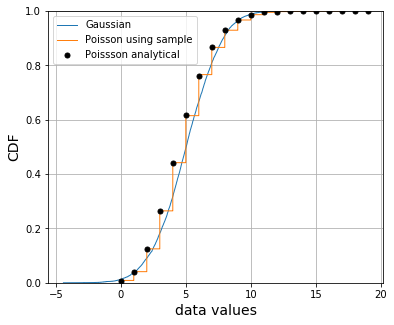

In [11]:
#gaus_dist = sp.norm.rvs(loc=5, scale=np.sqrt(5), size=10000)
#plt.hist(gaus_dist)
#plt.plot(sp.norm.cdf(gaus_dist, loc=5, scale=5))
plt.figure(figsize=(6.0,5.0))
ECDF(sp.norm.rvs(loc=5, scale=np.sqrt(5), size=10000), label='Gaussian')
ECDF(psn_dist, label='Poisson using sample')
plt.plot(np.arange(0, 20), sp.poisson.cdf(np.arange(0, 20), 5), '.k', markersize=10,
         label='Poissson analytical')
plt.legend()

### 2 b) For $\mu$ = 15

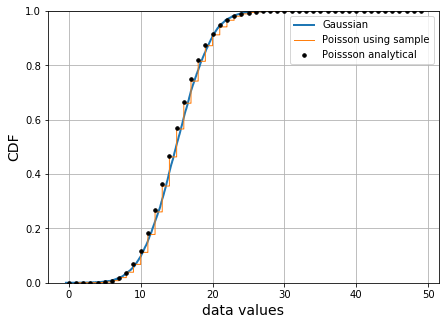

In [12]:
plt.figure(figsize=(7.0,5.0))
ECDF(sp.norm.rvs(loc=15, scale=np.sqrt(15), size=10000),  label='Gaussian', linewidth=2)
ECDF(sp.poisson.rvs(mu=15, size=10000), label='Poisson using sample')
plt.plot(np.arange(0, 50), sp.poisson.cdf(np.arange(0, 50), 15), '.k', markersize=7,
        label='Poissson analytical')
plt.legend()

### For $\mu = 50$

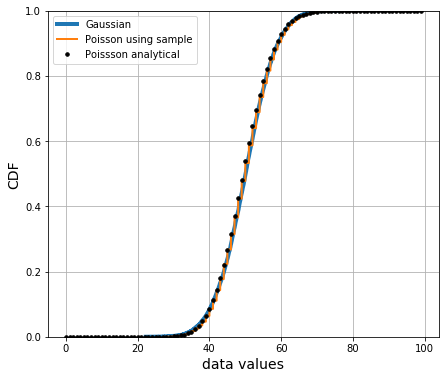

In [14]:
plt.figure(figsize=(7.0,6.0))
ECDF(sp.norm.rvs(loc=50, scale=np.sqrt(50), size=10000), label='Gaussian', linewidth=4)
ECDF(sp.poisson.rvs(mu=50, size=10000), label='Poisson using sample', linewidth=2)
plt.plot(np.arange(0, 100), sp.poisson.cdf(np.arange(0, 100), 50), '.k', markersize=7,
        label='Poissson analytical')
plt.legend()

### 1 c) A poisson distribution can be approximated as Gaussian when $\mu$ is large (greater than 20) along with a large sample size. The mean and variance of the Gaussian distribution is then equal to each other and has the same numerical value as the mean of the poisson distribution. Poisson distribution is a discrete distribution, so by aproximating it as a normal distribution we can treat it as a continuous distribution.

## Prb 2. Averaging across FITS files

### 2 a)

In [15]:
files = glob.glob('../data/Bias/*')

In [16]:
mean = []
stddv = []
median =[]
filename = []
for i, file in enumerate(files):
    f = fits.open(file)[1].data
    
    mean.append(np.mean(f))
    stddv.append(np.std(f))
    median.append(np.median(f))
    filename.append((str(file)[13:]))
    
info_table = QTable([filename, mean, median, stddv], 
                    names=('filename', 'mean', 'median', 'stddev'))

In [17]:
info_table

filename,mean,median,stddev
str22,float64,float64,float64
DE.20140624.03829.fits,993.7943430107331,994.0,4.983318421999622
DE.20140621.58698.fits,996.4759951582579,996.0,5.353890768397847
DE.20140621.58855.fits,996.6390407098788,997.0,6.773140323205364
DE.20140625.01648.fits,995.9665934625073,996.0,7.720884498779316


### 2 b)

In [18]:
fsum = np.zeros((4096, 2140))
fsum.shape

(4096, 2140)

In [19]:
for i, file in enumerate(files):
    f = fits.open(file)[1].data
    fsum += f
    #print(fsum[500:501, 400:450])
fsum /= 4.0

 ### 2 c)

In [20]:
print('mean of the average image : %f' %np.mean(fsum))
print('\nstandard deviation of the average image : %f' %np.std(fsum))
print('\nmedian of the average image : %f' %np.median(fsum))

mean of the average image : 995.718993

standard deviation of the average image : 3.178816

median of the average image : 995.750000


### The standard deviation of the averaged image is lower than each individual standard deviation of the images. As we are taking pixelwise average we are adding some random variables where the random variables are pixel values for each exposure. As they are independent then according to central limit theorem the distribution of their summation is approching standard normal distribution. As a result the variance is decreasing.

### 2 d) If the pixel values for bias image has a strong position dependence than they are not inpedendent. As a result central limit theorem would not be applicable in this case and we can not say variance will decrease or not. 

## Prb 3. Transformation of variables

### 3 a) x and y are two independent random variables with normal distributions. Then the random variable $x^2 + y^2$ can be approximated as a $\chi^2$ distribution with k=2. So  $\frac{x^2 + y^2}{\sigma^2} = \frac{r^2}{\sigma^2}=\chi^2(k=2)$. As the error radius contains 90% of the errors we can say the CDF of the distribution up to the value  $\chi^2(k=2)= \frac{r^2}{\sigma^2} = \frac{9}{\sigma^2}$ is 0.9. From there we can calculate the $\chi^2$ value for which CDF is 0.9 when k=2. Using this calculated  $\chi^2$ value we can find out $\sigma$ of the normal distribution for x and y. The percent point function (ppf) calculates the inverse of the CDF. 

### This argument may lead to a non-invertible function if the distribution of x and y has some non-zero mean.

In [21]:
sigma = np.sqrt(9/sp.chi2.ppf(.9, 2))
print('standard deviation: %f' %sigma)

standard deviation: 1.397972


### 3 b) Below we have checked whether or not this calculated $\sigma$ gives r values less than 3, ninety percent of the time.

In [22]:
x_dist = np.random.normal(0, 1.4, size=5000)
y_dist = np.random.normal(0, 1.4, size=5000)

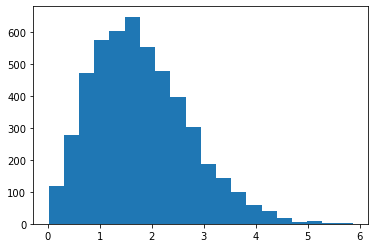

In [23]:
bins = plt.hist(np.sqrt(x_dist**2 + y_dist**2), bins=20)

In [24]:
m = np.sqrt(x_dist**2 + y_dist**2) < 3.0
pr = sum(m*1.0)/5000
print('percentage : %f' %pr)

percentage : 0.894400


## Prb 4. Getting familiar with $\chi^2$ and p-values

### 4 a) We can first calculate the CDF of the $\chi^2$ distribution with k=3. Using the complement of the CDF we can calculate the p value for $\chi^2=9$.

In [25]:
def p_val(dist, val):
    """
    This function calculates the p-value, given a 
    distribution and the value for which p-value 
    to be calculated. The calculated p-value will
    be more accurate if the sample size is very big.
    """
    
    sorteddist = np.sort(dist)
    fractiongrid = np.linspace(0,1,len(dist)+1)
    
    m = np.ones(len(sorteddist), dtype=bool)
    
    m = sorteddist >= val
    
    ind = m.tolist().index(True)
    
    p = 1- fractiongrid[ind+1]
    
    #print(sorteddist)
    #print(fractiongrid)
    #print(m)
    #print(ind)
    print('\np value : %f' %p)  #%round(p, 8)
    
    return p

In [26]:
dist= sp.chi2.rvs(df=3, size=200000)  # drawing samples from a chi^2 distribution with k=3
p = p_val(dist, val=9.0)                  # calculating p value for chi^2 = 9


p value : 0.029465


### We can check this p value using the survival function for the $\chi^2$ distribution from scipy.

In [27]:
print('p value : %f' %round(sp.chi2.sf(9, 3), 4))

p value : 0.029300


### 4 b) Now calculate p value for  $\chi^2=9$ when k=1.

In [28]:
dist= sp.chi2.rvs(df=1, size=200000) 
p = p_val(dist, val=9.0) 


p value : 0.002755


In [29]:
print('p value : %f' %round(sp.chi2.sf(9, 1), 4))

p value : 0.002700


### Comparing the p values we can see one data point is presenting a stronger case against the model.

### 4 c) First calculate the p values for  $\chi^2=12$ when k=10 and  $\chi^2=1200$ when k=1000.

In [30]:
dist= sp.chi2.rvs(df=10, size=200000) 
p = p_val(dist, val=12.0)


p value : 0.286435


In [31]:
print('p value : %f' %round(sp.chi2.sf(12, 10), 4))

p value : 0.285100


In [32]:
dist= sp.chi2.rvs(df=1000, size=20000000) 
p = p_val(dist, val=1200.0)


p value : 0.000011


In [33]:
print('p value : %f' %round(sp.chi2.sf(1200, 1000), 8))  

p value : 0.000012


### Comparing these two p values it is clear that the rule of thumb fails to capture the upper bound on $\chi^2$ for a given sample size for which the sample would not be in disagreement with the model.